In [24]:
# import required libraries
import numpy as np
import pandas as pd

In [25]:
# read COVID data files
COVID = pd.read_csv("https://covid19-lake.s3.us-east-2.amazonaws.com/rearc-covid-19-testing-data/csv/states_daily/states_daily.csv")
State_Pop = pd.read_csv("https://raw.githubusercontent.com/COVID19Tracking/associated-data/master/us_census_data/us_census_2018_population_estimates_states.csv")

In [26]:
# develop a list of the 50 states
cs = COVID.state.unique()
cs = np.delete(cs, [3,8,12,27,42,50])
cs

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [27]:
# Get user data

state='start'
States_of_interest = []
while state != "Done":
    state = input("Please add the two letter code for a state you would like to review or type 'Done'")
    if state != "Done":
        States_of_interest.append([1,state])

date_l = int(input('Please provide the ending date in the format YYYYMMDD: '))
date_e = int(input('Please provide the initial date in the format YYYYMMDD: '))
top = int(input('Please provide a number for the top states you would like to view: '))
n = int(input('Please provide number of days you would like to see on the graph: '))


Please add the two letter code for a state you would like to review or type 'Done' WA
Please add the two letter code for a state you would like to review or type 'Done' CA
Please add the two letter code for a state you would like to review or type 'Done' OR
Please add the two letter code for a state you would like to review or type 'Done' AZ
Please add the two letter code for a state you would like to review or type 'Done' Done
Please provide the ending date in the format YYYYMMDD:  20200715
Please provide the initial date in the format YYYYMMDD:  20200701
Please provide a number for the top states you would like to view:  10
Please provide number of days you would like to see on the graph:  60


In [28]:
# Create a function that identifies the Total increase in cases for all states over a specified time period

def get_state_data(cs,date_l,date_e):
    Totals = []
    for i in range(len(cs)):  
        state_data = COVID[COVID.state==cs[i]]
        date1 = state_data[state_data.date==date_l]
        date2 = state_data[state_data.date==date_e]
        date1_values = date1['positive'].values[0]
        date2_values = date2['positive'].values[0]
        x = (date1_values - date2_values)
        X = [x,cs[i]]
        Totals.append(X)
    return Totals

In [29]:
States_of_interest

[[1, 'WA'], [1, 'CA'], [1, 'OR'], [1, 'AZ']]

In [30]:
# Create a function that identifies the Total increase Per Capita

def get_total_pc_data(X):
    Total_pc = []
    for x in range(len(X)):
        y = (X[x][0]/State_Pop[State_Pop.state==X[x][1]].population.values[0])*100000
        Y = [y,X[x][1]]
        Total_pc.append(Y)
    return Total_pc

In [31]:
# Create a function that identifies the percent increase in case numbers

def get_state_percent_increase(cs,date_l,date_e):
    Total_pi = []
    for i in range(len(cs)):  
        state_data = COVID[COVID.state==cs[i]]
        date1 = state_data[state_data.date==date_l]
        date2 = state_data[state_data.date==date_e]
        date1_values = date1['positive'].values[0]
        date2_values = date2['positive'].values[0]
        x = (date1_values - date2_values)/date2_values*100
        X = [x,cs[i]]
        Total_pi.append(X)
    return Total_pi

In [32]:
def get_state_positive_ratio_change(X,date_l,date_e):
    Total_positive_ratio_change = []
    for i in range(len(X)):  
        state_data = COVID[COVID.state==X[i]]
        date1 = state_data[state_data.date==date_l]
        date2 = state_data[state_data.date==date_e]
        positive_values_l = date1['positive'].values[0]
        negative_values_l = date1['negative'].values[0]
        positive_values_e = date2['positive'].values[0]
        negative_values_e = date2['negative'].values[0]
        x = ((positive_values_l )/(positive_values_l + negative_values_l))*100
        y = ((positive_values_e )/(positive_values_e + negative_values_e))*100
        z = x-y
        Z = [z,X[i]]
        Total_positive_ratio_change.append(Z)
    return Total_positive_ratio_change

In [33]:
# Run functions to generate lists

Totals = get_state_data(cs,date_l,date_e)
Total_pc = get_total_pc_data(Totals)
Total_pi = get_state_percent_increase(cs,date_l,date_e)
Total_positive_ratio_change = get_state_positive_ratio_change(cs,date_l,date_e)


In [34]:

# Define a function for sorting a list numerically, grabbing the top number, creating an array for graphing

def get_top_number(X):
    X.sort()
    X = X[len(cs)-top:]
    return X


In [35]:
# Use the get_top_number function to get the top states in each category.

Totals_top=get_top_number(Totals)
Total_pc_top = get_top_number(Total_pc)
Total_pi_top = get_top_number(Total_pi)
Total_pos_ratio_top = get_top_number(Total_positive_ratio_change)

In [36]:
# Create a list of state to support creating a bar graph of the highest percent increases

Total_pi_top_graph_states = []
Total_pi_top_graph_percent = []
for i in range(len(Total_pi_top)):
    x = Total_pi_top[i][1]
    y = Total_pi_top[i][0]
    Total_pi_top_graph_states.append(x)
    Total_pi_top_graph_percent.append(y)
Total_pi_top_graph_states

['WV', 'AZ', 'NV', 'OK', 'SC', 'AK', 'TX', 'FL', 'ID', 'MT']

In [37]:
top_data_view = "cumulative"

# Create a list of values of Total cases for the past "n" number of days

for i in range(len(Totals_top)):
    state_data = COVID[COVID.state==Totals_top[i][1]]
    if top_data_view == "cumulative":
        state_data_graph = state_data.positive.values
    else:
        state_data_graph = state_data.positiveIncrease.values
    state_data_graph = np.flip(state_data_graph)
    state_data_graph=state_data_graph[len(state_data_graph)-n:]
    Totals_top[i][0] = state_data_graph

In [38]:
# Create a list of values of Total Per Capita cases for the past "n" number of days

for i in range(len(Total_pc_top)):
    state_data = COVID[COVID.state==Total_pc_top[i][1]]
    if top_data_view == "cumulative":
        state_data_graph = state_data.positive.values
    else:
        state_data_graph = state_data.positiveIncrease.values
    state_data_graph = np.flip(state_data_graph)
    state_data_graph=state_data_graph[len(state_data_graph)-n:]
    Total_pc_top[i][0] = (state_data_graph)/(State_Pop[State_Pop.state==Total_pc_top[i][1]].population.values[0])*100000

In [39]:
# Create a list of values of Total percent increase cases for the past "n" number of days

for i in range(len(Totals_top)):
    state_data = COVID[COVID.state==Total_pi_top[i][1]]
    state_data_graph = state_data.positiveIncrease.values
    state_data_graph = np.flip(state_data_graph)
    state_data_graph=state_data_graph[len(state_data_graph)-n:]
    Total_pi_top[i][0] = state_data_graph #- state_data_graph[len(state_data_graph)-n]

In [40]:
#Create a list of values for the states of interest over "n" number of days

for i in range(len(States_of_interest)):
    state_data = COVID[COVID.state==States_of_interest[i][1]]
    state_data_graph = state_data.positiveIncrease.values
    state_data_graph = np.flip(state_data_graph)
    state_data_graph=state_data_graph[len(state_data_graph)-n:]
    States_of_interest[i][0] = state_data_graph #- state_data_graph[len(state_data_graph)-n]

In [41]:
# Create a list of values for number of daily cases Per Capita for states of interest over "n" number of days

States_of_interest_pc = get_total_pc_data(States_of_interest)

In [42]:
# Create a list of values for the daily ratio of positive cases

for i in range(len(Total_pos_ratio_top)):  
    state_data = COVID[COVID.state==Total_pos_ratio_top[i][1]]
    state_data_graph = state_data.positive.values
    state_data_graph2 = state_data.negative.values
    state_data_graph3 = (state_data_graph/(state_data_graph2 + state_data_graph))*100
    state_data_graph3 = np.flip(state_data_graph3)
    state_data_graph3=state_data_graph3[len(state_data_graph3)-n:]
    Total_pos_ratio_top[i][0] = state_data_graph3

/Users/steve_tweea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [43]:
#Create State_of_interest_pos_ratio list

States_of_interest_pos_ratio = get_total_pc_data(States_of_interest)

In [44]:
for i in range(len(States_of_interest_pos_ratio)):  
    state_data = COVID[COVID.state==States_of_interest_pos_ratio[i][1]]
    state_data_graph = state_data.positive.values
    state_data_graph2 = state_data.negative.values
    state_data_graph3 = (state_data_graph/(state_data_graph2 + state_data_graph))*100
    state_data_graph3 = np.flip(state_data_graph3)
    state_data_graph3=state_data_graph3[len(state_data_graph3)-n:]
    States_of_interest_pos_ratio[i][0] = state_data_graph3

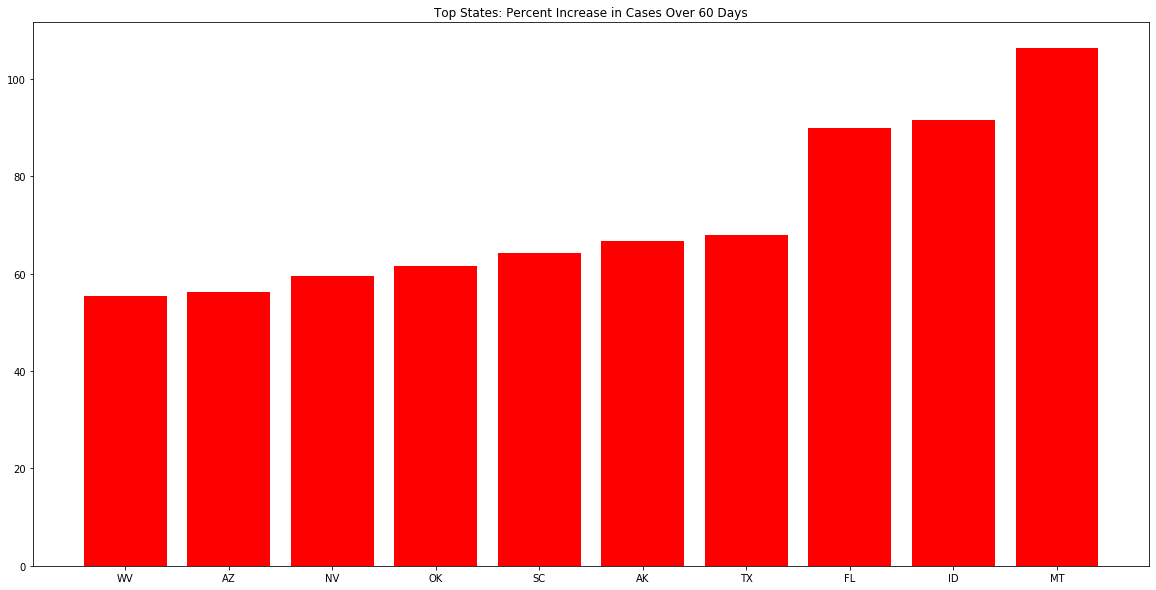

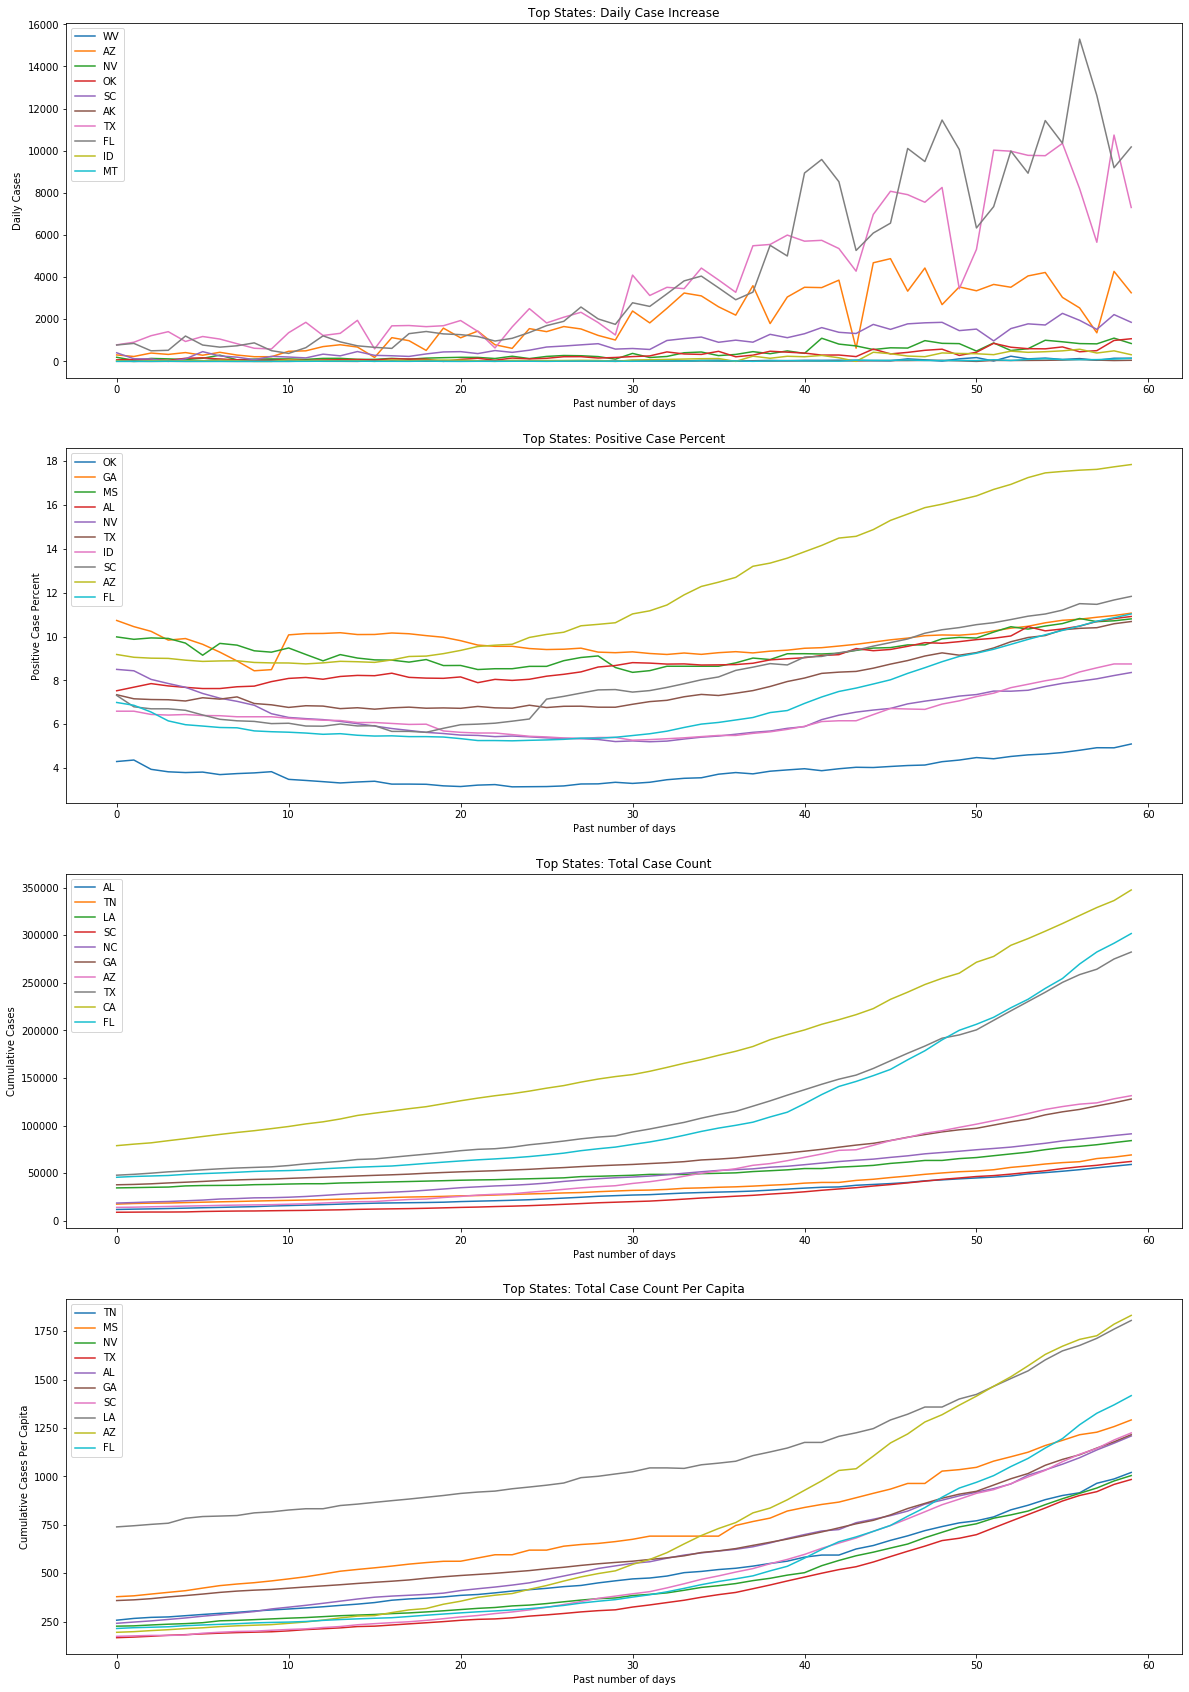

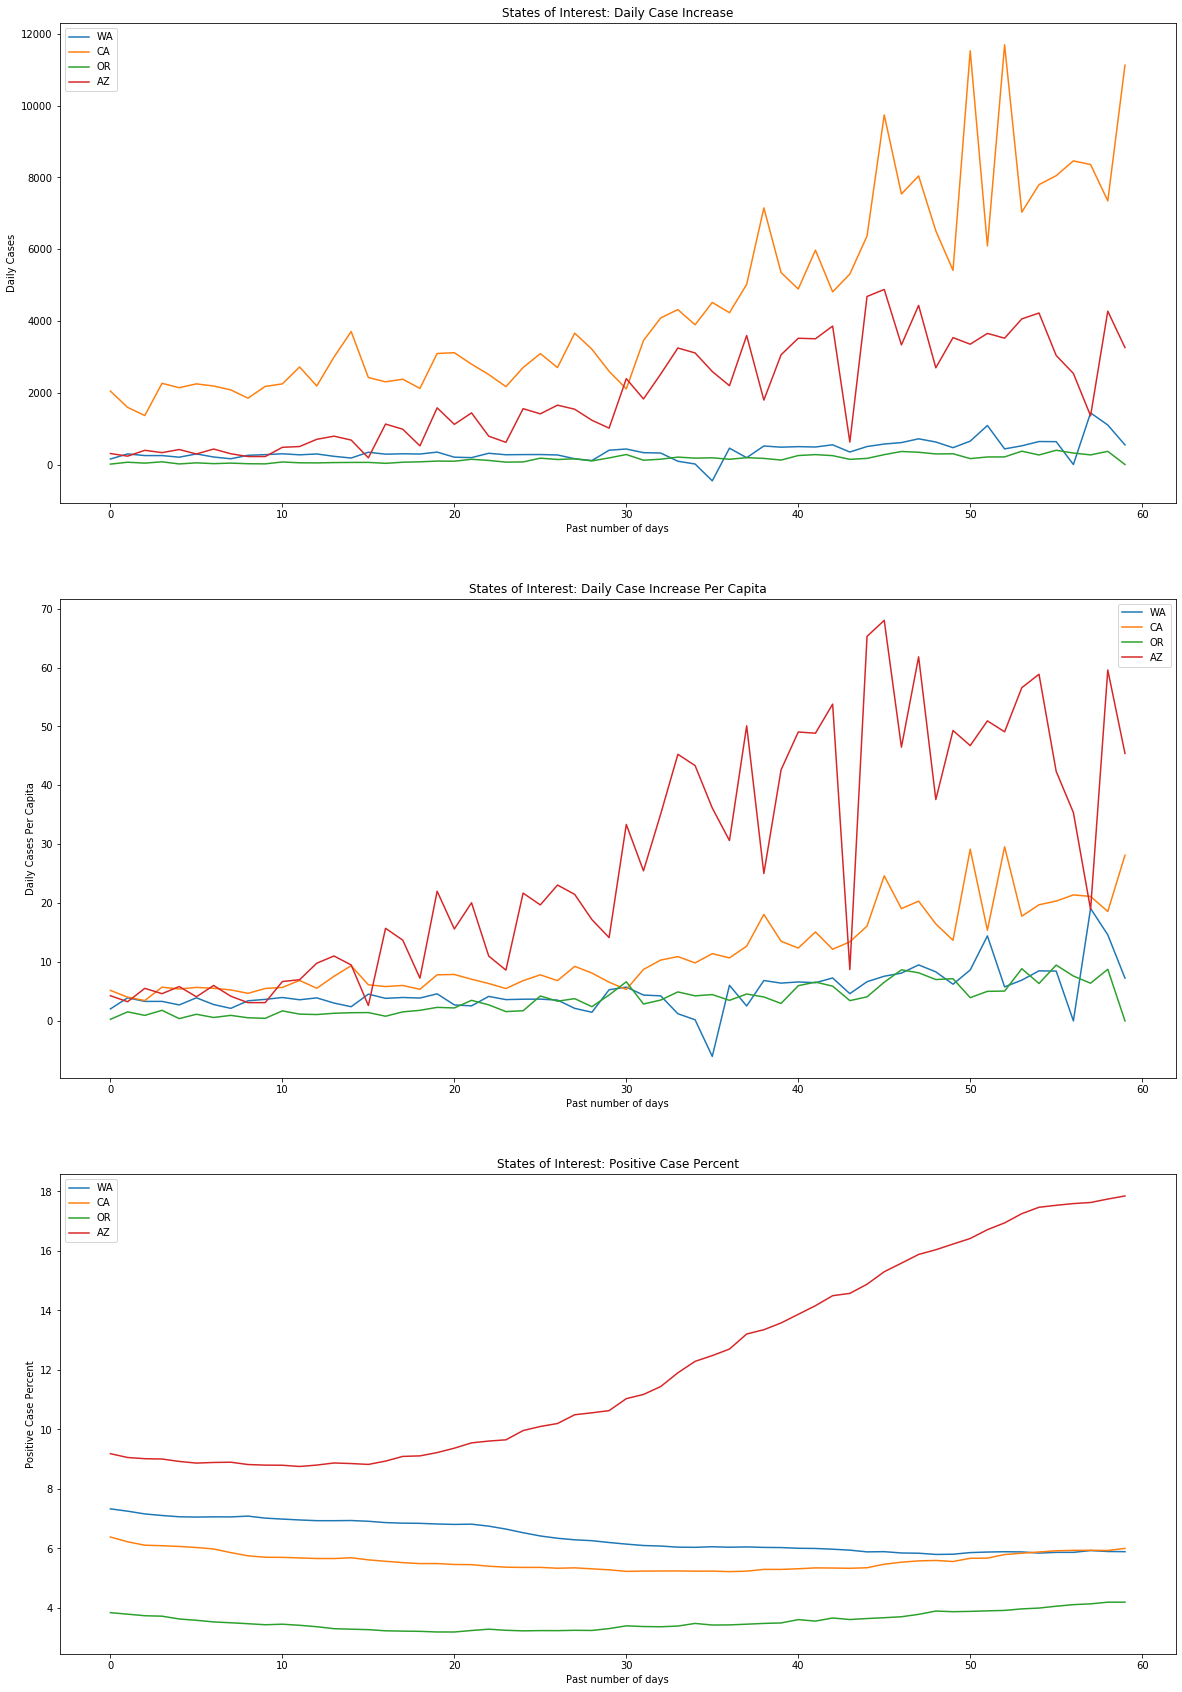

In [45]:
# Plot the data

%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot()

plt.bar(Total_pi_top_graph_states, Total_pi_top_graph_percent, color = "red")
plt.title('Top States: Percent Increase in Cases Over %i Days' % n)

fig=plt.figure(figsize=(20,30))

ax=fig.add_subplot(411)
for i in range(len(Total_pi_top)):
    ax.plot(Total_pi_top[i][0], label=Total_pi_top[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Daily Cases', fontsize = 10)
    ax.set_title('Top States: Daily Case Increase')
    
ax=fig.add_subplot(412)
for i in range(len(Total_pos_ratio_top)):
    ax.plot(Total_pos_ratio_top[i][0], label=Total_pos_ratio_top[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Positive Case Percent', fontsize = 10)
    ax.set_title('Top States: Positive Case Percent')
    
    
ax=fig.add_subplot(413)
for i in range(len(Totals_top)):
    ax.plot(Totals_top[i][0], label=Totals_top[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Cumulative Cases', fontsize = 10)
    ax.set_title('Top States: Total Case Count')
    
ax=fig.add_subplot(414)
for i in range(len(Total_pc_top)):
    ax.plot(Total_pc_top[i][0], label=Total_pc_top[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Cumulative Cases Per Capita', fontsize = 10)
    ax.set_title('Top States: Total Case Count Per Capita')
    
fig=plt.figure(figsize=(20,30))
    
ax=fig.add_subplot(311)
for i in range(len(States_of_interest)):
    ax.plot(States_of_interest[i][0], label=States_of_interest[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Daily Cases', fontsize = 10)
    ax.set_title('States of Interest: Daily Case Increase')
    
ax=fig.add_subplot(312)
for i in range(len(States_of_interest_pc)):
    ax.plot(States_of_interest_pc[i][0], label=States_of_interest_pc[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Daily Cases Per Capita', fontsize = 10)
    ax.set_title('States of Interest: Daily Case Increase Per Capita')
    
ax=fig.add_subplot(313)
for i in range(len(States_of_interest_pos_ratio)):
    ax.plot(States_of_interest_pos_ratio[i][0], label=States_of_interest_pos_ratio[i][1])
    ax.legend()
    ax.set_xlabel('Past number of days',fontsize = 10)
    ax.set_ylabel('Positive Case Percent', fontsize = 10)
    ax.set_title('States of Interest: Positive Case Percent')
    